## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data_Mouse_metadata.csv"
study_results_path = "data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

# Combine the data into a single dataset
full_dataset_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")

# Display the data table for preview
full_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = full_dataset_df['Mouse ID'].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

full_dataset_df['Mouse ID'].value_counts()


g989    13
o562    10
k483    10
w422    10
l700    10
        ..
o848     1
x336     1
x226     1
d133     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#g989_df = pd.DataFrame({'Mouse ID':'g989'})

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_full_dataset_df = full_dataset_df[full_dataset_df['Mouse ID'] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_full_dataset_df['Mouse ID'].value_counts()

o562    10
t724    10
q787    10
w422    10
l700    10
        ..
b447     1
u153     1
v199     1
t573     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#total_measurements = clean_full_dataset_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimens = clean_full_dataset_df.groupby(['Drug Regimen'])
total_measurement_df = drug_regimens.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
total_measurement_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

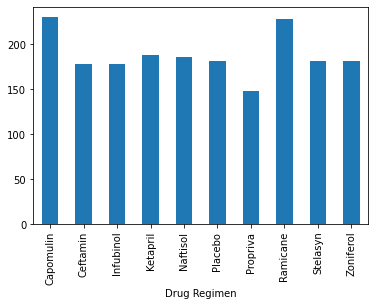

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurement = drug_regimens["Tumor Volume (mm3)"].count()
total_measurement
total_measurement.plot(kind="bar")

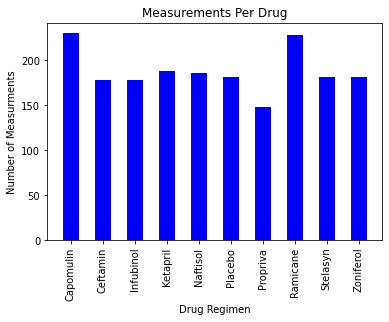

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data = total_measurement
drugs = list(data.keys())
#measures = list(data.count())
plt.bar(drugs, data, color='blue', width = 0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation =90)
plt.ylabel("Number of Measurments")
plt.title("Measurements Per Drug")
plt.show()

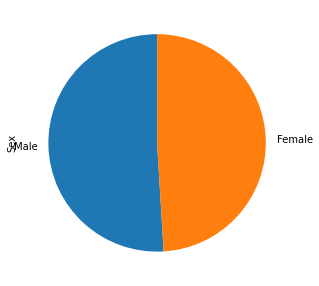

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = clean_full_dataset_df[["Mouse ID", "Sex"]].copy()
pie_mice = pie_df["Sex"].value_counts()

#pie_df = mice_df["Sex"]
plot = pie_mice.plot.pie(y='Sex', figsize=(5, 5), startangle=90)

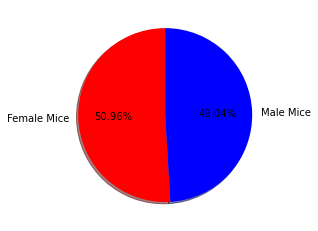

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_df = clean_full_dataset_df[["Mouse ID", "Sex"]].copy()
mice_df["Sex"].value_counts()

labels = ["Female Mice", "Male Mice"]
mice = mice_df["Sex"].value_counts()
colors = ["Red", "blue"]
plt.pie(mice, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_full_dataset_df[["Mouse ID", "Timepoint"]]
max_timepoint_df = timepoint_df.groupby(['Mouse ID'], as_index=False).max()
max_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(clean_full_dataset_df, max_timepoint_df, on=['Mouse ID','Timepoint'], how='right')
last_timepoint_df

four_treatments = (last_timepoint_df['Drug Regimen']=='Capomulin')|(last_timepoint_df['Drug Regimen']=='Ramicane')|(last_timepoint_df['Drug Regimen']=='Infubinol')|(last_timepoint_df['Drug Regimen']=='Ceftamin')
four_treatment_df = last_timepoint_df.loc[four_treatments] #'Tumor Volume (mm3)']
four_treatment_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []


for treatment in treatments:
    capomulin_df=four_treatment_df.loc[four_treatment_df["Drug Regimen"]=="Capomulin"]
    ramicane_df=four_treatment_df.loc[four_treatment_df["Drug Regimen"]=="Ramicane"]
    infubinol_df=four_treatment_df.loc[four_treatment_df["Drug Regimen"]=="Infubinol"]
    ceftamin_df=four_treatment_df.loc[four_treatment_df["Drug Regimen"]=="Ceftamin"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#tumor_vol_capomulin = capomulin_df['Tumor Volume (mm3)']
#tumor_vol_ramicane = ramicane_df['Tumor Volume (mm3)']
#tumor_vol_infubinol = infubinol_df['Tumor Volume (mm3)']
#tumor_vol_ceftamin = ceftamin_df['Tumor Volume (mm3)']

quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume for Capomulin is: {upperq}")
print(f"The interquartile range of tumor volume for Capomulin is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

tumor_vol_capomulin = capomulin_df['Tumor Volume (mm3)']
#tumor_vol_capomulin 

quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume for Ramicane is: {upperq}")
print(f"The interquartile range of tumor volume for Ramicane is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

tumor_vol_ramicane = ramicane_df['Tumor Volume (mm3)']
#tumor_vol_ramicane

quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume for Infubinol is: {upperq}")
print(f"The interquartile range of tumor volume for Infubinol is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")
tumor_vol_infubinol = infubinol_df['Tumor Volume (mm3)']
#tumor_vol_infubinol

quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upperq}")
print(f"The interquartile range of tumor volume for Ceftamin is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("")

tumor_vol_ceftamin = ceftamin_df['Tumor Volume (mm3)']
#tumor_vol_ceftamin


The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
The median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Value

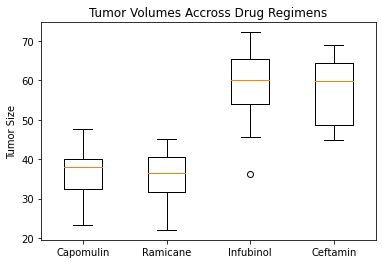

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vols = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]


fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volumes Accross Drug Regimens')
ax1.set_ylabel('Tumor Size')

ax1.boxplot(tumor_vols, labels = treatments)
plt.show()

## Line and Scatter Plots

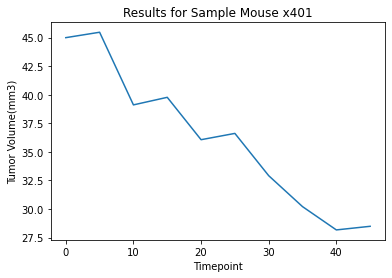

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401=clean_full_dataset_df.loc[clean_full_dataset_df["Mouse ID"]=="x401"]
#x401
plt.plot(x401['Timepoint'],x401['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Timepoint")
plt.title("Results for Sample Mouse x401")
plt.show()


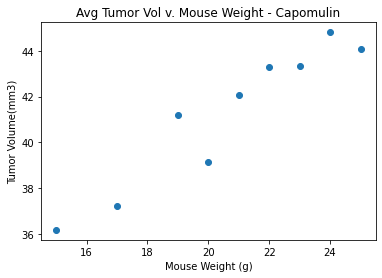

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_full_dataset_df.loc[clean_full_dataset_df["Drug Regimen"]=="Capomulin"]
#capomulin_df
capomulin_mice_by_weight = capomulin_df.groupby(["Weight (g)"], as_index=False)
capomulin_mice_by_weight
avg_tumor = capomulin_mice_by_weight["Tumor Volume (mm3)"].mean()
plt.scatter(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Avg Tumor Vol v. Mouse Weight - Capomulin")
plt.show()
avg_tumor

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and avg tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and avg tumor volume is 0.95


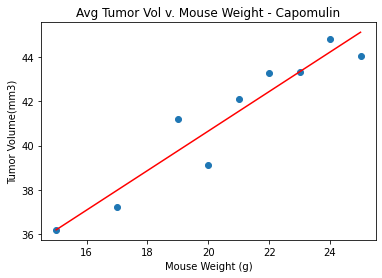

In [35]:
from scipy.stats import linregress
x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Avg Tumor Vol v. Mouse Weight - Capomulin")
plt.show()
